<a href="https://colab.research.google.com/github/AbhayUrmaliya2004/AbhayUrmaliya2004/blob/main/cats_vs_dog_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [6]:
!kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 98% 1.04G/1.06G [00:18<00:00, 309MB/s]
100% 1.06G/1.06G [00:18<00:00, 61.7MB/s]


In [7]:
import zipfile
zip_ref = zipfile.ZipFile('/content/dogs-vs-cats.zip', 'r')
zip_ref.extractall('/content')
zip_ref.close()

In [17]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [9]:
train_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/train',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (256,256),
    batch_size = 32,
)

test_ds =  keras.utils.image_dataset_from_directory(
    directory = '/content/test',
    labels = 'inferred',
    label_mode = 'int',
    image_size = (256,256),
    batch_size = 32,

)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [10]:
# normalise the data
def process(image, label):
  image = tf.cast(image/255, tf.float32)
  return image, label


train_ds = train_ds.map(process)
test_ds = test_ds.map(process)


In [61]:
# create CNN model

model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), padding='valid', activation='relu', input_shape = (256, 256, 3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(64, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Conv2D(128, kernel_size=(3,3), padding='valid', activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=2, padding='valid'))

model.add(Flatten())

# Dense layer
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))


In [62]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 254, 254, 32)      896       
                                                                 
 batch_normalization_6 (Bat  (None, 254, 254, 32)      128       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 127, 127, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 125, 125, 64)      18496     
                                                                 
 batch_normalization_7 (Bat  (None, 125, 125, 64)      256       
 chNormalization)                                                
                                                      

In [63]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [64]:
history = model.fit(train_ds, epochs=10, validation_data = test_ds)

Epoch 1/10
625/625 [==============================] - 71s 107ms/step - loss: 0.8445 - accuracy: 0.5502 - val_loss: 0.6619 - val_accuracy: 0.5774
Epoch 2/10
625/625 [==============================] - 69s 109ms/step - loss: 0.6304 - accuracy: 0.6386 - val_loss: 0.6141 - val_accuracy: 0.6724
Epoch 3/10
625/625 [==============================] - 68s 109ms/step - loss: 0.5440 - accuracy: 0.7212 - val_loss: 0.7183 - val_accuracy: 0.6440
Epoch 4/10
625/625 [==============================] - 69s 109ms/step - loss: 0.4463 - accuracy: 0.7969 - val_loss: 0.9373 - val_accuracy: 0.5296
Epoch 5/10
625/625 [==============================] - 66s 105ms/step - loss: 0.3606 - accuracy: 0.8464 - val_loss: 0.5814 - val_accuracy: 0.7188
Epoch 6/10
625/625 [==============================] - 69s 109ms/step - loss: 0.2896 - accuracy: 0.8767 - val_loss: 0.3060 - val_accuracy: 0.8692
Epoch 7/10
625/625 [==============================] - 65s 104ms/step - loss: 0.2267 - accuracy: 0.9079 - val_loss: 0.5215 - val_ac

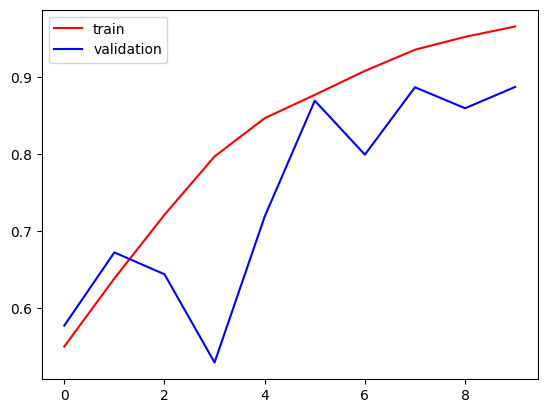

In [65]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

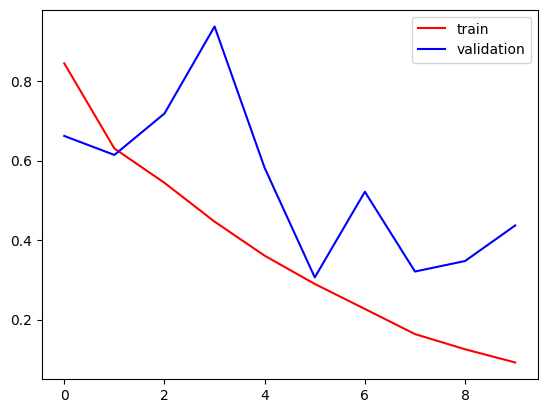

In [66]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [24]:
# here, training accuracy is increasing but validation accuracy is not increasing that simply means there is overfitting
# in the model

# ways to reduce overfitting
# Add more data
# Data Regularisation
# L1/L2 Regularisation
# Dropout
# batch normalisation
# Reduce complexity

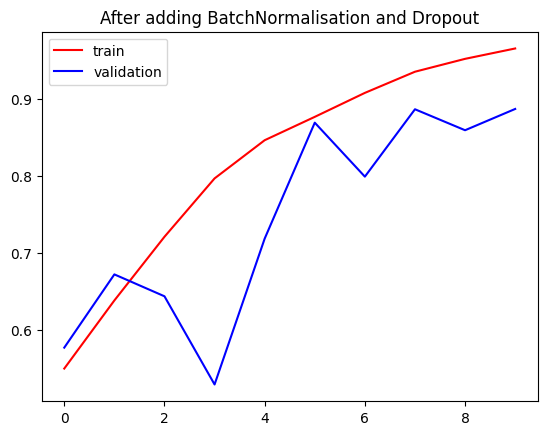

In [67]:
plt.title('After adding BatchNormalisation and Dropout')
plt.plot(history.history['accuracy'], color='red', label='train')
plt.plot(history.history['val_accuracy'], color='blue', label='validation')
plt.legend()
plt.show()

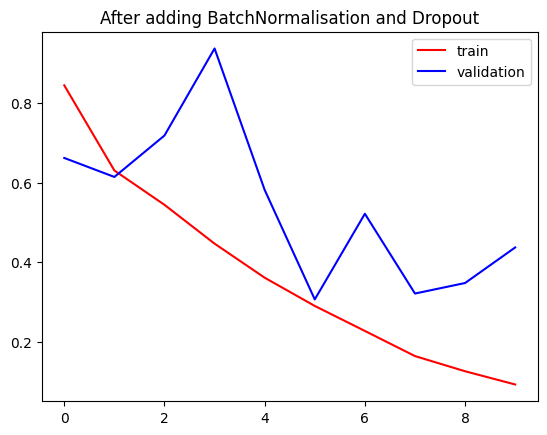

In [68]:
plt.title('After adding BatchNormalisation and Dropout')
plt.plot(history.history['loss'], color='red', label='train')
plt.plot(history.history['val_loss'], color='blue', label='validation')
plt.legend()
plt.show()

In [69]:
import cv2

In [70]:
cat = cv2.imread('/content/cat.jpg')
dog = cv2.imread('/content/dog.jpg')

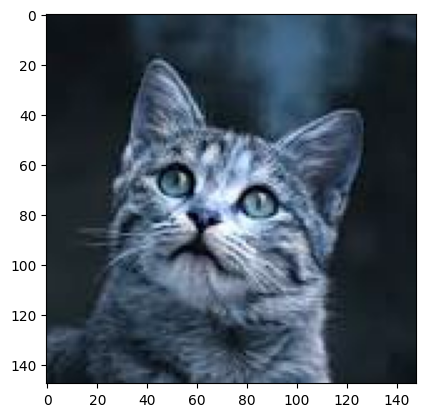

In [71]:
plt.imshow(cat)

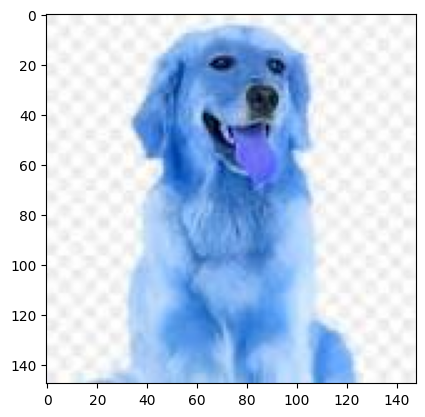

In [72]:
plt.imshow(dog)

In [73]:
cat.shape

(148, 148, 3)

In [74]:
dog.shape

(148, 148, 3)

In [75]:
subject = cv2.imread('/content/test/cats/cat.10.jpg')
sub2 = cv2.imread('/content/test/dogs/dog.100.jpg')

In [76]:
test_img = cv2.resize(subject, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

1/1 [==============================] - 0s 259ms/step


array([[1.]], dtype=float32)

In [77]:
test_img = cv2.resize(sub2, (256, 256))
test_input = test_img.reshape((1, 256, 256, 3))
model.predict(test_input)

1/1 [==============================] - 0s 27ms/step


array([[1.]], dtype=float32)